In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Make path variable and determine desired image dimensions
# test_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TEST/'
# train_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TRAIN/'
test_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TEST\\'
train_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TRAIN\\'


train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory=train_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory=test_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [3]:
for X_train, y_train in train_generator:
    print(X_train.shape, X_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

(20, 120, 160, 3) float32
(20, 4) float32


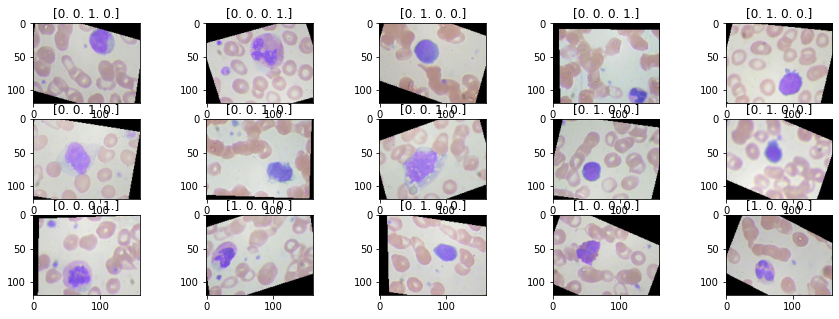

In [4]:
plt.figure(figsize=(15, 5))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(str(y_train[i]))
plt.show()

In [5]:
keras.backend.clear_session()

In [6]:
celclass = keras.models.Sequential()

celclass.add(keras.layers.InputLayer(input_shape=(120, 160, 3), name='Input'))  # 150x150 with 3 channels (color)

celclass.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'))
celclass.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

celclass.add(keras.layers.Conv2D(filters=48, kernel_size=(3,3), activation='tanh'))
celclass.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

celclass.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
celclass.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

celclass.add(keras.layers.Conv2D(filters=96, kernel_size=(3,3), activation='tanh'))
celclass.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

celclass.add(keras.layers.Flatten())

celclass.add(keras.layers.Dense(units=64, activation='tanh'))
celclass.add(keras.layers.Dense(units=4, activation='softmax'))
            
celclass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 38, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 36, 64)        27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 18, 64)       0

In [7]:
celclass.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)

In [8]:
results = celclass.fit_generator(
    generator=train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data=test_generator,
    validation_steps=20
)

Epoch 1/30


C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_15592/1077211197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = celclass.fit_generator(


100/100 [==============================] - 17s 161ms/step - loss: 1.6474 - categorical_accuracy: 0.2434 - val_loss: 1.3991 - val_categorical_accuracy: 0.2775
Epoch 2/30
100/100 [==============================] - 17s 166ms/step - loss: 1.3919 - categorical_accuracy: 0.2579 - val_loss: 1.3911 - val_categorical_accuracy: 0.2350
Epoch 3/30
100/100 [==============================] - 17s 166ms/step - loss: 1.4245 - categorical_accuracy: 0.2565 - val_loss: 1.4122 - val_categorical_accuracy: 0.2350
Epoch 4/30
100/100 [==============================] - 17s 166ms/step - loss: 1.3936 - categorical_accuracy: 0.2425 - val_loss: 1.3967 - val_categorical_accuracy: 0.2375
Epoch 5/30
100/100 [==============================] - 17s 167ms/step - loss: 1.3907 - categorical_accuracy: 0.2610 - val_loss: 1.3887 - val_categorical_accuracy: 0.2650
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 1.4244 - categorical_accuracy: 0.2560 - val_loss: 1.3847 - val_categorical_accuracy: 0.26

KeyboardInterrupt: 

In [ ]:
results.history.keys()

In [ ]:
plt.plot(results.history['loss'], 'go', label='Training loss')
plt.plot(results.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(results.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(results.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()